In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
ISR_files =  [url for url in os.listdir('data') if url.endswith('ISR.csv')]

In [3]:
from collections import defaultdict

# A 2-level defaultdict of dicts
stop_count_grouped = defaultdict(lambda: defaultdict(dict))

In [4]:
sample_df = pd.read_csv('data/2016-ISR.csv')
sample_df['CONTACT_DATE'] = pd.to_datetime(sample_df['CONTACT_DATE'])

C:\Users\aruba\AppData\Local\Temp\ipykernel_28512\2695447589.py:1: DtypeWarning: Columns (11,34,64,70,98,100,108,109,115,117,130,137,138,141,142,144,146,148,150,151,152,154,155,157,159,161,162,164,167) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_df = pd.read_csv('data/2016-ISR.csv')
C:\Users\aruba\AppData\Local\Temp\ipykernel_28512\2695447589.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sample_df['CONTACT_DATE'] = pd.to_datetime(sample_df['CONTACT_DATE'])


In [ ]:
stops_dfs = []
for file in ISR_files:
  df = pd.read_csv('data/' + file)
  df['CONTACT_DATE'] = pd.to_datetime(sample_df['CONTACT_DATE'])
  stops_dfs.append(df)

# Merge all dataframes into one
#stops_df = pd.concat(stops_dfs, ignore_index=True)

C:\Users\aruba\AppData\Local\Temp\ipykernel_28512\883283470.py:3: DtypeWarning: Columns (11,34,64,70,98,100,108,109,115,117,130,137,138,141,142,144,146,148,150,151,152,154,155,157,159,161,162,164,167) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/' + file)
C:\Users\aruba\AppData\Local\Temp\ipykernel_28512\883283470.py:3: DtypeWarning: Columns (98,99,100,107,108,109,145,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/' + file)
C:\Users\aruba\AppData\Local\Temp\ipykernel_28512\883283470.py:3: DtypeWarning: Columns (12,34,98,99,100,107,108,109,143,145,147,160) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/' + file)
C:\Users\aruba\AppData\Local\Temp\ipykernel_28512\883283470.py:3: DtypeWarning: Columns (12,98,100,108,109,143,145,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data

In [11]:
stops_df = pd.concat(stops_dfs[2:], ignore_index=True)
stops_df.shape

(592211, 169)

In [13]:
stops_df.columns

Index(['CONTACT_CARD_ID', 'CONTACT_TYPE_CD', 'CARD_NO', 'CONTACT_DATE',
       'CONTACT_HOUR', 'SUBMITTING_BEAT_CD', 'JUVENILE_I', 'CLOTHING_DESCR',
       'NAME_VERIFIED_I', 'RD_NO',
       ...
       'S_STOLEN_PROPERTY_I', 'S_STOLEN_PROPERTY_INVENTORY_NO', 'GANG_OTHER',
       'OTHER_DESCR', 'OTHER_INVENTORY_NO', 'S_OTHER_I', 'S_OTHER_DESCR',
       'S_OTHER_INVENTORY_NO', 'NAME', 'female'],
      dtype='object', length=170)

In [23]:
stops_df['female'] = stops_df['SEX_CODE_CD'].apply(lambda x: 1 if x == 'F' else 0)
stops_df['juvenile'] = stops_df['JUVENILE_I'].apply(lambda x: 1 if x == 'Y' else 0)
stops_df['hispanic'] = stops_df['RACE_CODE_CD'].apply(lambda x: 1 if x in {'WBH', 'WWH'} else 0)

In [29]:
stops_df = stops_df[stops_df['juvenile'] == 0]

In [19]:
def map_race(code):
    if code in ['WHI', 'WHT', 'WWH']:
        return 'white'
    elif code in ['BLK', 'WBH']:
        return 'black'
    elif code in ['API', 'P']:
        return 'aapi'
    else:
        return 'other'
    
stops_df['race'] = stops_df['RACE_CODE_CD'].apply(map_race)

In [ ]:
stops_df['COMPLEXION_CODE_CD'] = stops_df['COMPLEXION_CODE_CD'].apply(lambda x: None if x in ['RUD', 'XXX', 'YEL', 'ALB', 'SAL'] else x)
stops_df = stops_df[stops_df['COMPLEXION_CODE_CD'].notna()]

(535487, 173)

In [53]:
def map_complexion(code):
    if code in ['LGT']:
        return 1
    elif code in ['FAR']:
        return 2
    elif code in ['LBR', 'MED']:
        return 3
    elif code in ['OLV', 'MBR']:
        return 4    
    elif code in ['DBR']:
        return 5
    elif code in ['DRK', 'BLK']:
        return 6
    
stops_df['complexion'] = stops_df['COMPLEXION_CODE_CD'].apply(map_complexion)

In [39]:
Counter(stops_df['COMPLEXION_CODE_CD'])

Counter({'MBR': 133339,
         'MED': 120930,
         'LGT': 59587,
         'DRK': 54551,
         'DBR': 52556,
         'LBR': 46384,
         'BLK': 29566,
         'OLV': 22934,
         'FAR': 13740,
         None: 1900})

C:\Users\aruba\AppData\Local\Temp\ipykernel_28512\2685670843.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  white_complexion = stops_df[stops_df['race'] == 'white'][stops_df['hispanic'] == 0]['complexion'].dropna()


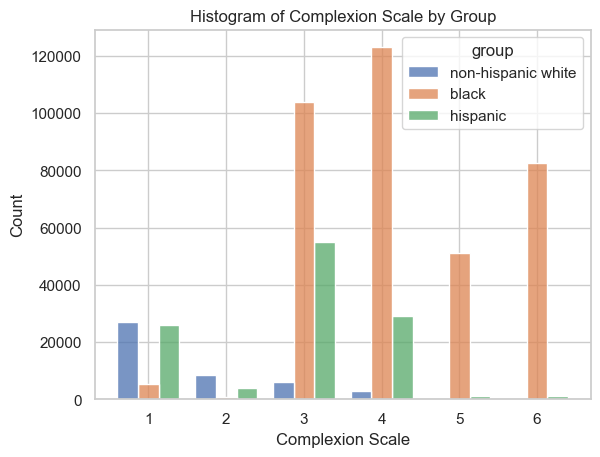

In [75]:
import seaborn as sns
sns.set(style="whitegrid")
# Prepare data for the three groups
white_complexion = stops_df[stops_df['race'] == 'white'][stops_df['hispanic'] == 0]['complexion'].dropna()
black_complexion = stops_df[stops_df['race'] == 'black']['complexion'].dropna()
hispanic_complexion = stops_df[stops_df['hispanic'] == 1]['complexion'].dropna()

# Combine into a DataFrame for seaborn
hist_df = pd.DataFrame({
    'complexion': pd.concat([white_complexion, black_complexion, hispanic_complexion], ignore_index=True),
    'group': (['non-hispanic white'] * len(white_complexion)) +
             (['black'] * len(black_complexion)) +
             (['hispanic'] * len(hispanic_complexion))
})

sns.histplot(
    data=hist_df,
    x='complexion',
    hue='group',
    bins=np.arange(0.5, 6.5, 1),
    multiple='dodge',
    discrete=True,
    shrink =0.8,
    #edgecolor='None',
)
plt.xlabel('Complexion Scale')
plt.ylabel('Count')
plt.title('Histogram of Complexion Scale by Group')
plt.show()

In [95]:
stops_df['outcome'] = 'stop'
stops_df.loc[stops_df['PAT_DOWN_I'] == 'Y', 'outcome'] = 'pat down'
stops_df.loc[stops_df['SEARCH_I'] == 'Y', 'outcome'] = 'search'
stops_df.loc[stops_df['ENFORCEMENT_TYPE_CD'] == 'ARR', 'outcome'] = 'arrest'

In [112]:
stops_df['beat'] = stops_df['BEAT']

In [109]:
for item in dict(Counter(stops_df['outcome'])).values():
    print(item / len(stops_df) * 100)

53.34069233320902
22.67708920944476
13.105641629200113
10.876576828146113


In [113]:
columns_to_keep = [
    'CONTACT_DATE', 'beat', 'outcome', 'complexion', 'race', 'female', 'hispanic'
]
stops_df = stops_df[columns_to_keep]

In [114]:
stops_df.to_excel('stops_cleaned.xlsx', index=False)

In [116]:
police_beat_demo = pd.read_csv('police_beat_demo.csv')
police_beat_demo.columns

Index(['beat', 'educ_some_hs', 'educ_college', 'pop', 'income', 'stability',
       'diversity', 'black', 'u18', 'hisp', 'male', 'nonhisp_white',
       'foodstamp', 'renter', 'aapi'],
      dtype='object')

In [131]:
police_beat_demo['neighborhood_race'] = 'mixed'
police_beat_demo.loc[police_beat_demo['nonhisp_white'] > 60, 'neighborhood_race'] = 'white majority'
police_beat_demo.loc[police_beat_demo['black'] > 60, 'neighborhood_race'] = 'black majority'
police_beat_demo.loc[police_beat_demo['hisp'] > 60, 'neighborhood_race'] = 'hispanic majority'
# police_beat_demo.loc[police_beat_demo['aapi'] > 60, 'neighborhood_race'] = 'aapi majority'

Counter(police_beat_demo['neighborhood_race'])

Counter({'black majority': 108,
         'white majority': 78,
         'mixed': 51,
         'hispanic majority': 38})

In [133]:
police_beat_demo['education'] = police_beat_demo['educ_college']

In [135]:
columns_to_keep = ['beat', 'neighborhood_race', 'education', 'foodstamp', 'renter', 'diversity']
police_beat_demo = police_beat_demo[columns_to_keep]
police_beat_demo.to_csv('police_beat_demo_cleaned.csv', index=False)

## Filter Stop Number

In [35]:
for file in ISR_files:
  sample_df = pd.read_csv('data/' + file)
  sample_df['CONTACT_DATE'] = pd.to_datetime(sample_df['CONTACT_DATE'])
  for month, subset in sample_df.groupby(pd.Grouper(key='CONTACT_DATE', freq='M')):
      for beat_num, sub_df in subset.groupby('BEAT'):
        # continue
        #  print("total_stops:", sub_df.size)
          stop_count_grouped[month][beat_num]['total_stops'] = sub_df.size
        #  print("juvenile_stops:", sub_df[sub_df['JUVENILE_I'] == 'Y'].size)
          stop_count_grouped[month][beat_num]['juvenile_stops'] = sub_df[sub_df['JUVENILE_I'] == 'Y'].size
        #  print("vehicle stops:", sub_df[sub_df['VEHICLE_INVOLVED_I'] == 'Y'].size)
          stop_count_grouped[month][beat_num]['vehicle_stops'] = sub_df[sub_df['VEHICLE_INVOLVED_I'] == 'Y'].size
        # print("Enforcement:", sub_df[sub_df['ENFORCEMENT_ACTION_TAKEN_I'] == 'Y'].size)
          stop_count_grouped[month][beat_num]['enforcement_stops'] = sub_df[sub_df['ENFORCEMENT_ACTION_TAKEN_I'] == 'Y'].size
        # print("female stops:", sub_df[sub_df['SEX_CODE_CD'] == 'F'].size)
          stop_count_grouped[month][beat_num]['female_stops'] = sub_df[sub_df['SEX_CODE_CD'] == 'F'].size
          black_stops = sub_df[sub_df['RACE_CODE_CD'] == 'BLK'].size + sub_df[sub_df['RACE_CODE_CD'] == 'WBH'].size
          hispanic_stops = sub_df[sub_df['RACE_CODE_CD'] == 'WWH'].size + sub_df[sub_df['RACE_CODE_CD'] == 'WBH'].size
          skin_light = sub_df[sub_df['COMPLEXION_CODE_CD'].isin(['ALB', 'LGT', 'FAR', 'RUD', 'SAL'])].size
          skin_medium = sub_df[sub_df['COMPLEXION_CODE_CD'].isin(['MED', 'OLV', 'YEL', 'LBR'])].size
          skin_dark = sub_df[sub_df['COMPLEXION_CODE_CD'].isin(['MBR', 'DRK', 'BLK', 'DBR'])].size
          stop_count_grouped[month][beat_num]['black_stops'] = black_stops
          stop_count_grouped[month][beat_num]['hispanic_stops'] = hispanic_stops
          stop_count_grouped[month][beat_num]['skin_light'] = skin_light
          stop_count_grouped[month][beat_num]['skin_medium'] = skin_medium
          stop_count_grouped[month][beat_num]['skin_dark'] = skin_dark
          
      for beat_num, res_df in subset.groupby('RES_BEAT'):
        #  print("Res beat stop count:", res_df.size)
          stop_count_grouped[month][beat_num]['res_beat_stops'] = res_df.size


C:\Users\aruba\AppData\Local\Temp\ipykernel_37644\1284530206.py:2: DtypeWarning: Columns (11,34,64,70,98,100,108,109,115,117,130,137,138,141,142,144,146,148,150,151,152,154,155,157,159,161,162,164,167) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_df = pd.read_csv('data/' + file)
C:\Users\aruba\AppData\Local\Temp\ipykernel_37644\1284530206.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sample_df['CONTACT_DATE'] = pd.to_datetime(sample_df['CONTACT_DATE'])
C:\Users\aruba\AppData\Local\Temp\ipykernel_37644\1284530206.py:2: DtypeWarning: Columns (98,99,100,107,108,109,145,147) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_df = pd.read_csv('data/' + file)
C:\Users\aruba\AppData\Local\Temp\ipykernel_37644\1284530206.py:3: UserWarning: Could not infer format, so each element wi

In [36]:
records = []
for outer_key, middle_dict in stop_count_grouped.items():
    for inner_key, innermost_dict in middle_dict.items():
        row = {
            "months": outer_key,
            "beat": inner_key,
        }
        # Add the innermost dict's key-value pairs to this row
        row.update(innermost_dict)
        records.append(row)

df = pd.DataFrame(records)
print(df)

          months    beat  total_stops  juvenile_stops  vehicle_stops   
0     2016-01-31   111.0       4056.0           507.0          338.0  \
1     2016-01-31   112.0       2197.0             0.0          338.0   
2     2016-01-31   113.0       6929.0           676.0         1352.0   
3     2016-01-31   114.0        507.0             0.0            0.0   
4     2016-01-31   121.0       2366.0           169.0          169.0   
...          ...     ...          ...             ...            ...   
26600 2023-12-31  1611.0          NaN             NaN            NaN   
26601 2023-12-31  1614.0          NaN             NaN            NaN   
26602 2023-12-31  4100.0          NaN             NaN            NaN   
26603 2023-12-31  5100.0          NaN             NaN            NaN   
26604 2023-12-31  6100.0          NaN             NaN            NaN   

       enforcement_stops  female_stops  black_stops  hispanic_stops   
0                 3042.0         338.0       3042.0           50

In [38]:
df_sorted = df.sort_values(by=['months', 'beat'])
print(df_sorted)

          months    beat  total_stops  juvenile_stops  vehicle_stops   
0     2016-01-31   111.0       4056.0           507.0          338.0  \
1     2016-01-31   112.0       2197.0             0.0          338.0   
2     2016-01-31   113.0       6929.0           676.0         1352.0   
3     2016-01-31   114.0        507.0             0.0            0.0   
4     2016-01-31   121.0       2366.0           169.0          169.0   
...          ...     ...          ...             ...            ...   
26597 2023-12-31  2535.0       9464.0           338.0         5408.0   
26598 2023-12-31  3100.0       2197.0             0.0         1521.0   
26602 2023-12-31  4100.0          NaN             NaN            NaN   
26603 2023-12-31  5100.0          NaN             NaN            NaN   
26604 2023-12-31  6100.0          NaN             NaN            NaN   

       enforcement_stops  female_stops  black_stops  hispanic_stops   
0                 3042.0         338.0       3042.0           50

In [41]:
df_sorted['year'] = df_sorted['months'].dt.year
df_sorted['month'] = df_sorted['months'].dt.month
df_sorted = df_sorted.rename(columns={'months': 'datetime'})
# Reorder columns
cols = ['year', 'month', 'datetime'] + [col for col in df_sorted.columns if col not in ['year', 'month', 'datetime']]
df_sorted = df_sorted[cols]

print(df_sorted)

       year  month   datetime    beat  total_stops  juvenile_stops   
0      2016      1 2016-01-31   111.0       4056.0           507.0  \
1      2016      1 2016-01-31   112.0       2197.0             0.0   
2      2016      1 2016-01-31   113.0       6929.0           676.0   
3      2016      1 2016-01-31   114.0        507.0             0.0   
4      2016      1 2016-01-31   121.0       2366.0           169.0   
...     ...    ...        ...     ...          ...             ...   
26597  2023     12 2023-12-31  2535.0       9464.0           338.0   
26598  2023     12 2023-12-31  3100.0       2197.0             0.0   
26602  2023     12 2023-12-31  4100.0          NaN             NaN   
26603  2023     12 2023-12-31  5100.0          NaN             NaN   
26604  2023     12 2023-12-31  6100.0          NaN             NaN   

       vehicle_stops  enforcement_stops  female_stops  black_stops   
0              338.0             3042.0         338.0       3042.0  \
1              338.

In [49]:
df_sorted.to_excel('count_stops.xlsx', index=False)

In [ ]:
# Number of arrests
for file in ISR_files:
  sample_df = pd.read_csv('data/' + file)
  sample_df['CONTACT_DATE'] = pd.to_datetime(sample_df['CONTACT_DATE'])
  for month, subset in sample_df.groupby(pd.Grouper(key='CONTACT_DATE', freq='M')):
      for beat_num, sub_df in subset.groupby('BEAT'):
        # continue
        #  print("total_stops:", sub_df.size)
          stop_count_grouped[month][beat_num]['total_stops'] = sub_df.size
        # 
          stop_count_grouped[month][beat_num]['skin_dark'] = skin_dark


In [ ]:
df_sorted['hit_rate'] = df_sorted['enforcement_stops'] / df_sorted['total_stops']
df_sorted['hit_rate_prev_month'] = df_sorted.groupby('beat')['hit_rate'].shift(1)
print(df_sorted)

       year  month   datetime    beat  total_stops  juvenile_stops   
0      2016      1 2016-01-31   111.0       4056.0           507.0  \
1      2016      1 2016-01-31   112.0       2197.0             0.0   
2      2016      1 2016-01-31   113.0       6929.0           676.0   
3      2016      1 2016-01-31   114.0        507.0             0.0   
4      2016      1 2016-01-31   121.0       2366.0           169.0   
...     ...    ...        ...     ...          ...             ...   
26597  2023     12 2023-12-31  2535.0       9464.0           338.0   
26598  2023     12 2023-12-31  3100.0       2197.0             0.0   
26602  2023     12 2023-12-31  4100.0          NaN             NaN   
26603  2023     12 2023-12-31  5100.0          NaN             NaN   
26604  2023     12 2023-12-31  6100.0          NaN             NaN   

       vehicle_stops  enforcement_stops  female_stops  black_stops   
0              338.0             3042.0         338.0       3042.0  \
1              338.

In [48]:
df_sorted

,year,month,datetime,beat,total_stops,juvenile_stops,vehicle_stops,enforcement_stops,female_stops,black_stops,hispanic_stops,skin_light,skin_medium,skin_dark,res_beat_stops,hit_rate,hit_rate_prev_month
0,2016,1,2016-01-31,111.0,4056.0,507.0,338.0,3042.0,338.0,3042.0,507.0,676.0,845.0,2028.0,NaN,0.750000,NaN
1,2016,1,2016-01-31,112.0,2197.0,0.0,338.0,1352.0,169.0,2028.0,0.0,169.0,1014.0,1014.0,169.0,0.615385,NaN
2,2016,1,2016-01-31,113.0,6929.0,676.0,1352.0,4901.0,338.0,5915.0,507.0,507.0,1690.0,4056.0,169.0,0.707317,NaN
3,2016,1,2016-01-31,114.0,507.0,0.0,0.0,507.0,0.0,0.0,0.0,507.0,0.0,0.0,NaN,1.000000,NaN
4,2016,1,2016-01-31,121.0,2366.0,169.0,169.0,1183.0,169.0,1352.0,338.0,507.0,845.0,845.0,NaN,0.500000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26597,2023,12,2023-12-31,2535.0,9464.0,338.0,5408.0,1521.0,1014.0,3887.0,5070.0,845.0,4056.0,4225.0,4225.0,0.160714,0.120690
26598,2023,12,2023-12-31,3100.0,2197.0,0.0,1521.0,338.0,0.0,1014.0,845.0,169.0,1352.0,676.0,152776.0,0.153846,0.269231
26602,2023,12,2023-12-31,4100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27885.0,NaN,0.000000
26603,2023,12,2023-12-31,5100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5239.0,NaN,NaN
